**Name:** Ayaz Rathod <br/>
**Project:** Migrator <br/>
**IRS Migration county_inflow_Data EDA** <br/>

In [65]:
# Imprt the libraries we are going to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [45]:
df = pd.read_excel('County_InFlow_Data.xlsx')

In [46]:
df1 = df.copy()

In [47]:
df1.head(10)

,y2_statefips,y2_countyfips,y1_statefips,y1_countyfips,y1_state,y1_countyname,n1,n2,agi
0,1,0,96,0,AL,Total Migration-US and Foreign,100390,207334,4835874
1,1,0,97,0,AL,Total Migration-US,99527,205203,4782089
2,1,0,97,1,AL,Total Migration-Same State,56323,115151,2486684
3,1,0,97,3,AL,Total Migration-Different State,43204,90052,2295405
4,1,0,98,0,AL,Total Migration-Foreign,863,2131,53785
5,1,1,96,0,AL,Autauga County Total Migration-US and Foreign,1870,4326,94250
6,1,1,97,0,AL,Autauga County Total Migration-US,1830,4190,91390
7,1,1,97,1,AL,Autauga County Total Migration-Same State,1173,2529,48813
8,1,1,97,3,AL,Autauga County Total Migration-Different State,657,1661,42577
9,1,1,98,0,AL,Autauga County Total Migration-Foreign,40,136,2861


In [48]:
df1.head(100)

,y2_statefips,y2_countyfips,y1_statefips,y1_countyfips,y1_state,y1_countyname,n1,n2,agi
0,1,0,96,0,AL,Total Migration-US and Foreign,100390,207334,4835874
1,1,0,97,0,AL,Total Migration-US,99527,205203,4782089
2,1,0,97,1,AL,Total Migration-Same State,56323,115151,2486684
3,1,0,97,3,AL,Total Migration-Different State,43204,90052,2295405
4,1,0,98,0,AL,Total Migration-Foreign,863,2131,53785
...,...,...,...,...,...,...,...,...,...
95,1,7,97,1,AL,Bibb County Total Migration-Same State,325,747,13482
96,1,7,97,3,AL,Bibb County Total Migration-Different State,38,88,1848
97,1,7,98,0,AL,Bibb County Total Migration-Foreign,-1,-1,-1
98,1,7,1,7,AL,Bibb County Non-migrants,6227,14522,330041


In [49]:
print(df1.columns.values)

['y2_statefips' 'y2_countyfips' 'y1_statefips' 'y1_countyfips' 'y1_state'
 'y1_countyname' 'n1' 'n2' 'agi']


In [50]:
column_names = {
    'y2_statefips': 'Destination From State',
    'y2_countyfips': 'Destination From County',
    'y1_statefips': 'Origin From State Code',
    'y1_countyfips': 'Origin From County Code',
    'y1_state': 'Origin State',
    'y1_countyname': 'Origin County',
    'n1': 'Number of Returns',
    'n2': 'Number of Exemptions',
    'agi': 'Adjusted Gross Income'
}

df1.rename(columns = column_names, inplace = True)

In [51]:
df1.head(10)

,Destination From State,Destination From County,Origin From State Code,Origin From County Code,Origin State,Origin County,Number of Returns,Number of Exemptions,Adjusted Gross Income
0,1,0,96,0,AL,Total Migration-US and Foreign,100390,207334,4835874
1,1,0,97,0,AL,Total Migration-US,99527,205203,4782089
2,1,0,97,1,AL,Total Migration-Same State,56323,115151,2486684
3,1,0,97,3,AL,Total Migration-Different State,43204,90052,2295405
4,1,0,98,0,AL,Total Migration-Foreign,863,2131,53785
5,1,1,96,0,AL,Autauga County Total Migration-US and Foreign,1870,4326,94250
6,1,1,97,0,AL,Autauga County Total Migration-US,1830,4190,91390
7,1,1,97,1,AL,Autauga County Total Migration-Same State,1173,2529,48813
8,1,1,97,3,AL,Autauga County Total Migration-Different State,657,1661,42577
9,1,1,98,0,AL,Autauga County Total Migration-Foreign,40,136,2861


In [52]:
print(df1.columns.values)

['Destination From State' 'Destination From County'
 'Origin From State Code' 'Origin From County Code' 'Origin State'
 'Origin County' 'Number of Returns' 'Number of Exemptions'
 'Adjusted Gross Income']


**DataTypes**<br/>

In [53]:
df1.dtypes

Destination From State      int64
Destination From County     int64
Origin From State Code      int64
Origin From County Code     int64
Origin State               object
Origin County              object
Number of Returns           int64
Number of Exemptions        int64
Adjusted Gross Income       int64
dtype: object

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356898 entries, 0 to 356897
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Destination From State   356898 non-null  int64 
 1   Destination From County  356898 non-null  int64 
 2   Origin From State Code   356898 non-null  int64 
 3   Origin From County Code  356898 non-null  int64 
 4   Origin State             356898 non-null  object
 5   Origin County            356898 non-null  object
 6   Number of Returns        356898 non-null  int64 
 7   Number of Exemptions     356898 non-null  int64 
 8   Adjusted Gross Income    356898 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 24.5+ MB


In [55]:
df1.isnull().sum()

Destination From State     0
Destination From County    0
Origin From State Code     0
Origin From County Code    0
Origin State               0
Origin County              0
Number of Returns          0
Number of Exemptions       0
Adjusted Gross Income      0
dtype: int64

**Searching for all Missing Values**

In [56]:
df1.duplicated().sum()

20338

**Total number of Columns and Rows in File**

In [57]:
df1.describe()

,Destination From State,Destination From County,Origin From State Code,Origin From County Code,Number of Returns,Number of Exemptions,Adjusted Gross Income
count,356898.000000,356898.000000,356898.000000,356898.000000,3.568980e+05,3.568980e+05,3.568980e+05
mean,29.261910,97.257917,46.524758,57.463852,1.924890e+03,3.912810e+03,1.449642e+05
std,15.782968,110.968151,28.051969,98.154937,2.515949e+04,5.217191e+04,2.266468e+06
min,1.000000,0.000000,1.000000,0.000000,-1.000000e+00,-1.000000e+00,-4.126510e+05
25%,16.000000,31.000000,24.000000,3.000000,2.700000e+01,5.000000e+01,1.372000e+03
50%,29.000000,71.000000,48.000000,19.000000,5.400000e+01,1.020000e+02,3.029000e+03
75%,45.000000,121.000000,59.000000,81.000000,1.880000e+02,3.600000e+02,1.028000e+04
max,56.000000,840.000000,98.000000,840.000000,3.768510e+06,7.841705e+06,3.474391e+08


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
#attributes = df['Destination From State','Destination From County','Origin State','Adjusted Gross Income']
#attributes.hist(bins=10, figsize=(25,20))

df1['Origin State'] = pd.to_numeric(df1['Adjusted Gross Income'])

C:\Users\Ayaz Rathod\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Adjusted Gross Income'>

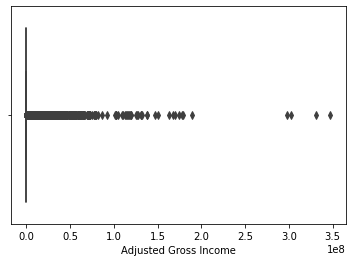

In [60]:
sns.boxplot(df1['Adjusted Gross Income'])

<AxesSubplot:xlabel='Origin County'>

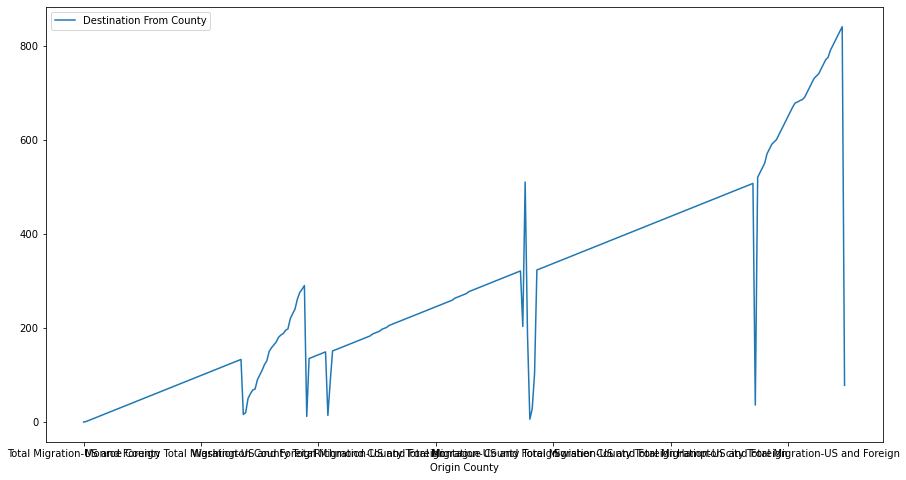

In [61]:
h = df1.groupby('Destination From County').head(1)
h.plot(x = 'Origin County', y = 'Destination From County', figsize = (15,8))

In [62]:
cor = df1[['Destination From State','Destination From County',
 'Origin From State Code','Origin From County Code','Origin State',
 'Origin County','Number of Returns','Number of Exemptions',
 'Adjusted Gross Income']]

<AxesSubplot:>

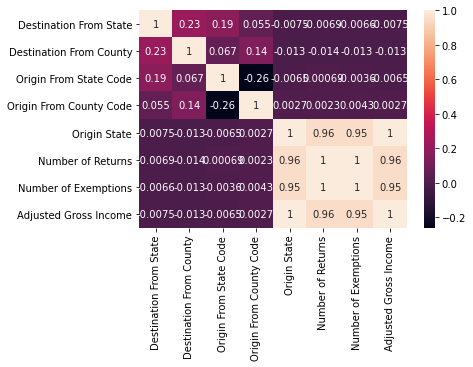

In [63]:
sns.heatmap(cor.corr(),annot=True)

Origin State
-412651       51
-328108       47
-324221       47
-322300       48
-205430       51
              ..
 189030708    17
 298006276     6
 302754063     6
 330740878     6
 347439077     6
Name: Destination From State, Length: 65954, dtype: int64


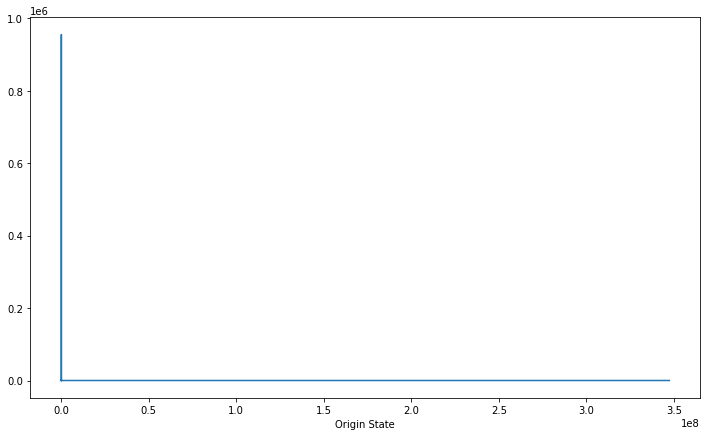

In [64]:
test = df1.groupby(['Origin State'])['Destination From State'].agg('sum')
test.plot(figsize=(12,7))
print(test)